# **Exercise 2**
## **Group members**:
* Antonio Feltrin, antonio.feltrin@studenti.unipd.it, ID 2097126
* Giosuè Sardo Infirri, giosue.sardoinfirri@studenti.unipd.it, ID 2090564 
* Riccardo Tancredi, riccardo.tancredi@studenti.unipd.it, ID 2089395
* Simone Toso, simone.toso.2@studenti.unipd.it, ID 2095484

#### **Import all necessary dependencies**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14
from IPython.display import display_html 
import pandas as pd
import gzip
import matplotlib as mplt

#### **Flow control**: control and process of the data we generate 

In [2]:
# type of encoding
one_hot = True

# sigmoid takes into account energy difference = 2
SPINS = False
# type of gradient: Adam or Vanilla SGD
ADAM = True

# centering trick
centering = False
# Data: we start with data_b (CASE = 1 in the lecture notebook) and then later we will study data_c 
data = "b" 
# CD-n iterations
CD = 20
# mini batch size for the SGD in the RBM training
mini_batch_size = 16
# Number of epochs for the RBM training
Number_of_epochs = 100

# Draw weights function of the hidden unit in a A*G table
draw_weigths = False

# If we want to save data
save_file = False

#### **Data generation**: we generate the data as the CASE = 1 shown in class. Data from the folder "Data_c", where there is the file with the unknown data, are displayed at the end of the notebook.

In [3]:
# random seed for reproducibility
np.random.seed(12345)

# size of dataset
N = 10000
# number of block for one-hot encoding
G = 5 
# number of categories
A = 4 if data == "b" else 6
# number of categories of kind 0
A0 = int(A/2)
# number of categories of kind 1
A1 = A-A0
#
AA = [A0, A1]
# size of each data point
L = G*A
#  
# Noise: probability q to change category
q = 0.1  # 0.1 then 

print(f"L={L}, A={A}, G={G}")

x,y = np.zeros((N,L)).astype(int), np.zeros(N).astype(int)

if data == "b":
    for n in range(N):
        # kind of the first slot
        k = np.random.randint(0,2)
        # label
        y[n] = k
        i0=0
        for g in range(G):
            # normal choice
            i = np.random.randint(0, AA[k])
            j = i + i0 + k*A0
            if np.random.random()<q:
                # normal choice
                i = np.random.randint(0,A)
                j = i + i0
            
            if(n<2): 
                print(f"k={k}, g={g}, i0={i0}, i={i}, j={j}, AA[k]={AA[k]}")
            # one-hot encoding
            x[n][j] = 1
            i0= i0 + A
            k = 1 - k
                    
        if(n<3): print(x[n], y[n])

elif data == "c":
    x = np.loadtxt('Data_c/x_RBM_q0.2.dat', delimiter=" ",dtype=int)

else:
    print("Select your data")

print("...")    

L=20, A=4, G=5
k=0, g=0, i0=0, i=1, j=1, AA[k]=2
k=1, g=1, i0=4, i=2, j=6, AA[k]=2
k=0, g=2, i0=8, i=1, j=9, AA[k]=2
k=1, g=3, i0=12, i=1, j=15, AA[k]=2
k=0, g=4, i0=16, i=1, j=17, AA[k]=2
[0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0] 0
k=1, g=0, i0=0, i=1, j=3, AA[k]=2
k=0, g=1, i0=4, i=0, j=4, AA[k]=2
k=1, g=2, i0=8, i=1, j=11, AA[k]=2
k=0, g=3, i0=12, i=0, j=12, AA[k]=2
k=1, g=4, i0=16, i=1, j=19, AA[k]=2
[0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1] 1
[0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0] 1
...


In [4]:
# data print taken from lecture notebooks
def is_one(cell_value):
    color0 = 'background-color: blue; color: white'
    color1 = 'background-color: cyan;'
    if type(cell_value) in [float, int]:
        if cell_value == 1:
            return color1
    return color0

N1=12
df0 = pd.DataFrame(x[:N1])

df0s = df0.style.set_table_attributes("style='display:inline'")
df0s.applymap(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)

display_html(df0s._repr_html_(), raw=True)

df=df0
t=[i for i in range(N1)]
g = pd.Categorical(df[t]).codes # convert groups to indexs  
df.style.apply(
    lambda x: ['background-color: {}'.format("#FFCCCC") for i in g], 
    subset=[0,1,2,3, 8,9,10,11, 16,17,18,19 ]
)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
2,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
5,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0
6,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
7,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
8,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
9,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
2,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
5,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0
6,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
7,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
8,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
9,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0


### We work with 2 hidden units (**M = 2**) for both *data_b* and *data_c*. Actually, when *one_hot = True*, so when we force the RBM to work with the one hot encoding, only **one** hidden unit is sufficient for *data_b*, but this is kind of an overfitting situation, in which we stress only one unit to work. We then decided to keep 2 as the number of neurons.

In [5]:
# As seen in class, we name "v" for "visible" instead of using x
v = np.copy(x)
# store in v0, because later we will shuffle v
v0 = np.copy(v)

if SPINS:
    GAP = 2 # is given by setting Energy levels = +- 1 and from the Boltzmann distribution getting a sigmoid function with coefficient 2 at the exponent
    v = 2*v - 1
    vmin = -1
else:
    GAP = 1
    vmin = 0

# RBM, number of hidden units
M = 2

# range of each initial weight, as seen in class
sigma = np.sqrt(4. / float(L + M))
# random seed for reproducibility
np.random.seed(12345)
# initial weights from a Normal distr. (see literature, e.g. page 98 of Mehta's review)
w = sigma * np.random.randn(L, M)
a = sigma * np.random.randn(L)
b = np.zeros(M)
print("w[:3] =", w[:3])
print("a =", a[:3])
print('...')
w0, a0, b0 = np.copy(w), np.copy(a), np.copy(b)

w[:3] = [[-0.08728764  0.20422213]
 [-0.22148941 -0.2369642 ]
 [ 0.83821165  0.59415024]]
a = [-1.00605956 -0.0850854  -0.6575091 ]
...


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1]


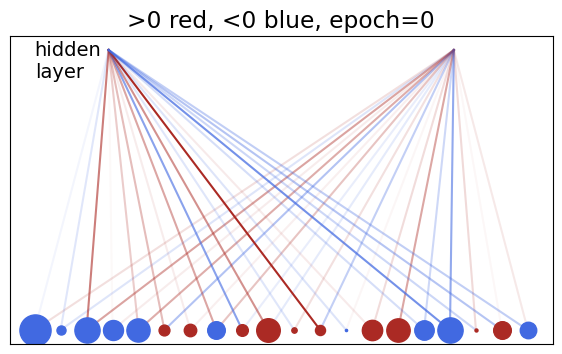

In [6]:
# Plot functions, as done in class
def create_coord(np,x0,f=1.0):
    x=[x0] * np
    print(x)
    y=list(range(np))
    for i in range(np):
        y[i] = f*(y[i]/(3*np-1) - 0.5) if np == 1 else f*(y[i]/(np-1.) - 0.5)
    return (x,y)
(x1,y1)=create_coord(L,0)
(x2,y2)=create_coord(M,1,f=0.7)

def mycolor(val):
    if val>0: return '#ab2a24'
    elif val<0: return 'royalblue'
    else: return 'black'
    
def plotgraph(epoch=0):
    fig, ax = plt.subplots(1,1 , figsize=(7, 4))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(),-w.min())
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i],y2[j]),(x1[i],x2[j]),mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*abs(w[i][j]))
    # Scatter plot on top of lines
    #A=300./(a.max()+b.max())
    A=500.
    for i in range(L):
        ax.scatter(y1[i],x1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(300,A*abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
    ax.text(-0.5,0.9,"hidden\nlayer")
    plt.show()
                  
plotgraph()

In [7]:
# Eq(213) page 97, activation via sigmoid
# Taking into account energy gap DE = 2 for "spin" variables (-1,1)
def activate(v_in, wei, bias, DE, info=False,): 
    act = np.dot(v_in, wei) + bias
    n = np.shape(act)
    prob = 1. / (1. + np.exp(-DE*act))              # updated sigmoid function
    v_out = np.full(n, vmin, dtype=int)             # a list on -1's or 0's
    v_out[np.random.random_sample(n) < prob] = 1    # activate the 1's with probability prob
    if info:
        print('input=', v_in)
        print('act=',act)
        print('prob=',prob)
        print('output=',v_out)
    return v_out

k = 0
activate(v[k],w,b,GAP,info=True)
print("")

input= [0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0]
act= [-0.06384217 -0.44192049]
prob= [0.48404488 0.39128345]
output= [0 0]



#### We use the method of fixing the one-hot encoding. We remind that, given the possibilities $[1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]$, the energy of each group is given by $$-E = \sum_i a_i v_i + \sum_{i,\mu}W_{i\mu}v_ih_\mu$$ In theory there would also be the term $\sum_\mu b_\mu h_\mu$. However, since this term is the same for all of the possible encodings, we will neglect it when evaluating the Boltzmann weight of each encoding.

#### For the centering trick, this equation holds: $$-E_c = \sum_i a_i (v_i - \mu_i) + \sum_{i,\mu}W_{i\mu}(v_i - \mu_i)(h_\mu - \lambda_\mu) = \sum_i a_i v_i + \sum_{i,\mu}W_{i\mu}v_i(h_\mu - \lambda_\mu) - c$$ where, as we did with the $\sum_\mu b_\mu h_\mu$ terms for the non-centering part, there is a $v$-independent $c$ term that we can leave out. The function here presented is the same in both cases, with the difference that if we want to use the centering trick $(v_i - \mu_i)$ and $(h_\mu - \lambda_\mu)$ are passed to the function, instead of $v_i$ and $h_\mu$.

In [8]:
def one_hot_generator(nBlocks, w, h, a, ampl=1): # nBlocks = G
    if data == "b":
        encodings = [np.array([1,0,0,0]),np.array([0,1,0,0]),np.array([0,0,1,0]),np.array([0,0,0,1])]   # possible encodings
    else:
        encodings = [np.array([1,0,0,0,0,0]),np.array([0,1,0,0,0,0]),np.array([0,0,1,0,0,0]),np.array([0,0,0,1,0,0]), np.array([0,0,0,0,1,0]), np.array([0,0,0,0,0,1])]
    if SPINS:
        for i in range(len(encodings)):
            encodings[i] = 2*encodings[i] - np.ones(A, dtype=int)       # change of representation if Spins == True, so when GAP = 2 and vmin = -1
    vf = np.zeros(L)    # new configuration initialized as series of zeros
    for block in range(nBlocks):    
        # for each block of 4 bits we try all encodings and choose one at random with probability given by the boltzmann distribution
        probabilities = []
        for encoding in encodings: # for each possible encoding 1000, 0100, ... we evaluate the energy and its corresponding probability
            energy = np.dot(a[block*A: (block+1)*A] + w[block*A:(block+1)*A, ]@h, encoding) # interaction of the chosen block with its local field
            probabilities.append(np.exp(energy*ampl))
        probabilities = probabilities / sum(probabilities)          # normalized probability    
        cumulatives = [sum(probabilities[:i+1]) for i in range(A)]  # cumulative probability function 
        random = np.random.uniform(0., 1.)      
        # Here we look for the first index at which the cumulatives are higher than the uniform random variable
        choice = 0 
        for i in range(A):
            if cumulatives[i] > random : 
                choice = i
                break 
        # Now choice is the index of the encoding we wanted
        vf[block*A:(block+1)*A] = encodings[choice]
    return vf

### **ADAM class**: implementation of Adam algorithm 

In [9]:
# Inspired from https://towardsdatascience.com/how-to-implement-an-adam-optimizer-from-scratch-76e7b217f1cc
class AdamOptim():
    def __init__(self, eta=1e-3, beta1=0.9, beta2=0.99, epsilon=1e-8):
        ## Initialization of Adam variables and coefficients
        self.m_dw, self.s_dw = np.zeros((L, M)), np.zeros((L, M))
        self.m_da, self.s_da = np.zeros(L), np.zeros(L)
        self.m_db, self.s_db = np.zeros(M), np.zeros(M)
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.eta = eta
        
    def update(self, t, w, a, b, dw, da, db):
        ## dw, da, db are from current minibatch
        
        ### first momenta beta 1
        # *** weights *** #
        self.m_dw = self.beta1*self.m_dw + (1-self.beta1)*dw
        # *** biases of hidden units *** #        
        self.m_db = self.beta1*self.m_db + (1-self.beta1)*db
        # *** biases *** #
        self.m_da = self.beta1*self.m_da + (1-self.beta1)*da

        ### second momenta beta 2
        # *** weights *** #
        self.s_dw = self.beta2*self.s_dw + (1-self.beta2)*(dw**2)
        # *** biases of hidden units *** #
        self.s_da = self.beta2*self.s_da + (1-self.beta2)*(da**2)
        # *** biases *** #
        self.s_db = self.beta2*self.s_db + (1-self.beta2)*(db**2)

        ## bias correction via first and second momenta
        m_dw_corr = self.m_dw/(1-self.beta1**t)
        m_da_corr = self.m_da/(1-self.beta1**t)
        m_db_corr = self.m_db/(1-self.beta1**t)
        s_dw_corr = self.s_dw/(1-self.beta2**t)
        s_da_corr = self.s_da/(1-self.beta2**t)
        s_db_corr = self.s_db/(1-self.beta2**t)

        ## update weights and biases
        w = w + self.eta*(m_dw_corr/(np.sqrt(s_dw_corr)+self.epsilon))
        a = a + self.eta*(m_da_corr/(np.sqrt(s_da_corr)+self.epsilon))
        b = b + self.eta*(m_db_corr/(np.sqrt(s_db_corr)+self.epsilon))
        
        ## return updated weights and biases
        return w, a, b 

### Vanilla SGD

In [10]:
# Basic steps of vanilla gradient descent, from eq.(211)
def vanilla(w, a, b, dw, da, db):
    w = w + dw
    a = a + da
    b = b + db
    return w, a, b

### **Log-likelihood**: log-likelihood as a function of the epoch 

In [11]:
def energy_is(v, h, w, a, b):
    # computation of the current energy
    return - np.dot(a,v) - np.dot(b,h) - np.dot(v.T@w,h)    

# In order to compute the Z partition function, one_hot_generator2 takes in input a string in base 4 (e.g. 0123) 
# and outputs the corresponding configuration of blocks with one hot encoding (e.g. 0001 0010 0100 1000) 
def one_hot_generator2(input, A, G):
    encodings = [np.array([0,0,0,1]), np.array([0,0,1,0]), np.array([0,1,0,0]), np.array([1,0,0,0])]
    output = []
    for i in input:
        output.append(encodings[int(i)])
    output = np.array(output)
    output = output.reshape(A*G,)
    if SPINS:
        # change of representation: here vmin = -1
        output = output*GAP + np.full(A*G,vmin) 
    return output

# This function computes the Z partition function and the log-likelihood
def log_likelihood(w, a, b, v, h):
    eng, Z= 0, 0 
    for i in range(N):
        # we compute the energy for each data point {v, h}, where h is the set of hidden variables generated
        eng += energy_is(v[i], h[i], w, a, b)
    eng /= v.shape[0] # v.shape[0] = N: average among all the possibilities

    # total number of configurations = (A**G)*(2**M)
    for i in range(int(A**G)): # A**G = 4**5 1024, 2*M
        vgen = np.base_repr(i, base=A).zfill(G)     # base 4 representation of the visible units: this is the input of the one_hot_generator2 function
        vgen = one_hot_generator2(vgen, A, G)
        for j in range(int(2**M)):
            hgen = np.base_repr(j, base=2).zfill(M) # base 2 representation of the hidden units
            hgen = np.array([int(x) for x in str(hgen)])
            if SPINS:
                # change of representation: here vmin = -1
                hgen = hgen*GAP + np.full(M, vmin)
            # The partition function is the sum of all the Boltzmann factors
            Z += np.exp(-energy_is(vgen, hgen, w, a, b))

    # Log-likelihood term
    L = - eng - np.log(Z) # L is going to be maximized    
    return L

#### **Adversarial Accuracy Indicator**: other quality indicator described in the paper by Decelle et al (pag. 3 supplementive material)

In [12]:
def E_AAI(v, h):
    v_copy = np.copy(v)
    h_copy = np.copy(h)
    if SPINS:
        # change of representation: here vmin = -1
        v_copy = ((v_copy + 1)/2).astype(int)
        h_copy = ((h_copy + 1)/2).astype(int)
    # Calculation of A_S & A_T
    A_S, A_T = 0, 0
    
    for i in range(v.shape[0]):
        # Bitwise operation to spot all the different elements
        # The sum all the errors represents the distance searched function: the more elements are different the higher the distance function will be 
        distances_TS = np.sum((h_copy[i] ^ v_copy), axis=1)
        distances_ST = np.sum((v_copy[i] ^ h_copy), axis=1)
        distances_SS = np.sum((v_copy[i] ^ v_copy), axis=1)
        distances_TT = np.sum((h_copy[i] ^ h_copy), axis=1)
        
        # Update of the diagonal element: in this way the diagonal elements are no more zero
        # We sum to the diagonal element +30 (+20 it's still ok) so that the diagonal elements are not spotted in the next computation
        # This is done because there could be non diagonal elements for which the distance is zero.
        distances_SS[i] = 30
        distances_TT[i] = 30

        if np.min(distances_SS) < np.min(distances_ST):
            A_S += 1
        elif np.min(distances_SS) == np.min(distances_ST) and one_hot:
            A_S += 0.5
        else:
            A_S += 0
        
        if np.min(distances_TT) < np.min(distances_TS):
            A_T += 1
        elif np.min(distances_TT) == np.min(distances_TS) and one_hot:
            A_T += 0.5
        else:
            A_T += 0

    print("Calculating the adversarial accuracy indicator...")
    return A_S/v.shape[0], A_T/v.shape[0]

In [13]:
# Calculation of the MSE estimate (energy) of the two indicators (pag. 3 supplementive material)
def E(v, v1):
    A_S, A_T = E_AAI(v, v1)
    return A_S, A_T, (A_S-0.5)**2+(A_T-0.5)**2

### **Our score**: we wanted to check the fraction of data that follows the pattern (*left-right* polarization) that we had defined when generating the dataset. This will be useful in analysing the goodness of the final denoised data.
### For data = "b" we then introduced a function called *our_score* and for data = "c", the unknow data, a further function called *our_score_mysterious* to estimate the goodness of the RBM. In the latter case, we checked if the data followed the pattern we supposed to be the correct one.

In [14]:
# for data_b
def our_score(v1):
    scores = 0 
    
    dfscore = pd.DataFrame(((v1[:N]-vmin)/(1-vmin)).astype(int))

    nBlocks = int(L/4)

    for nRow in range(N): 
        # We check the alternance of left-right polarization
        row = dfscore.iloc[nRow,:]
        positions = [] 
        corretto = True
        for block in range(nBlocks): # DSDSDSDS --> check that this configuration alternates left-right
            doub = 0
            blocchetto = row[block*4:(block+1)*4]
            index = 0
            for i in range(4):
                if blocchetto[block*4 + i] == 1:
                    index = i
                    doub += 1
            if doub != 1:
                corretto = False
            if index < 2:
                positions.append(0) # 0 --> left
                
            else:
                positions.append(1) # 1 --> right
    
        for index in range(len(positions)-1):           # for each 0 1 in the array
            if positions[index] == positions[index+1]:  # check if there is repetition 
                corretto = False
        if corretto == True:
            scores += 1             # update the score result

    # return the normalized score value
    return  scores/N

In [15]:
# for data_c
def our_score_mysterious(v1):
    scores = 0
    dfscore = pd.DataFrame(((v1[:N]-vmin)/(1-vmin)).astype(int))
    
    nBlocks = int(L/6) #number of blocks
    
    for nRow in range(N): #for each row
        row = dfscore.iloc[nRow,:]
        positions = []
        corretto = True
        for block in range(nBlocks):
            doub = 0
            blocchetto = row[block*6:(block+1)*6]
            index = 0
            for i in range(A):
                if blocchetto[block*6 + i] == 1:
                    index = i
                    doub += 1
            if doub!= 1:
                corretto = False
            if index < 3:
                positions.append(0) # --> left
            else:
                positions.append(1) # --> right
                
        #Check if the pattern is ok --> for each one, check that it is different from the one 2 after
        for index in range(len(positions)-2):
            if positions[index] == positions[index + 2]:
                corretto = False
        
        if corretto == True:
            scores += 1             # update the score result

    # return the normalized score value
    return  scores/N

### **Entropy**: another indicator shown in the paper by Decelle et al (pag. 3-4 supplementive material)

In [16]:
def S(v, v1):
    idx1 = np.random.randint(v.shape[0], size=int(v.shape[0]/2))
    idx2 = np.random.randint(v1.shape[0], size=int(v1.shape[0]/2))
    v_1_new = np.concatenate((v[idx1, :], v1[idx2, :]))
    delta_entropy = len(gzip.compress(v))/len(gzip.compress(v_1_new)) -1 
    return delta_entropy

## **RBM train**: we train the model using the parameters set in the initial notebook cell 
### The first lines are control lines: we set the time variable for Adam or the learning rate for Vanilla SGD as well as the centering trick parameters. All the outputs obtained are widely discussed in the assigment, and here, at the end of the notebook, only some qualitative plots are shown.

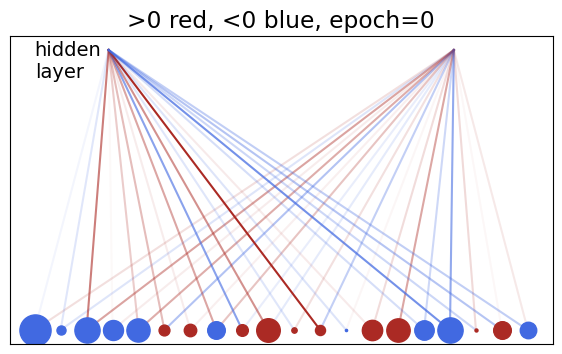

epoch = 0
epoch = 1
epoch = 2
epoch = 3
epoch = 4
epoch = 5
epoch = 6
epoch = 7
epoch = 8
Calculating the adversarial accuracy indicator...
epoch = 9
epoch = 10
epoch = 11
epoch = 12
epoch = 13
epoch = 14
epoch = 15
epoch = 16
epoch = 17
epoch = 18
Calculating the adversarial accuracy indicator...
epoch = 19
epoch = 20
epoch = 21
epoch = 22
epoch = 23
epoch = 24
epoch = 25
epoch = 26
epoch = 27
epoch = 28
Calculating the adversarial accuracy indicator...
epoch = 29
epoch = 30
epoch = 31
epoch = 32
epoch = 33
epoch = 34
epoch = 35
epoch = 36
epoch = 37
epoch = 38
Calculating the adversarial accuracy indicator...
epoch = 39
epoch = 40
epoch = 41
epoch = 42
epoch = 43
epoch = 44
epoch = 45
epoch = 46
epoch = 47
epoch = 48
Calculating the adversarial accuracy indicator...
epoch = 49
epoch = 50
epoch = 51
epoch = 52
epoch = 53
epoch = 54
epoch = 55
epoch = 56
epoch = 57
epoch = 58
Calculating the adversarial accuracy indicator...
epoch = 59
epoch = 60
epoch = 61
epoch = 62
epoch = 63
epoch 

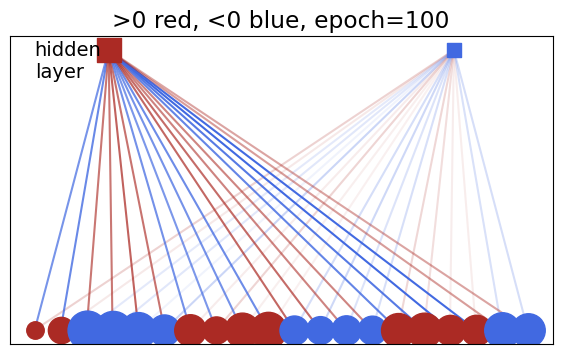

In [17]:
# random seed for reproducibility
np.random.seed(12345)

# initial plot
plotgraph(0)

# learning rate for SGD - vanilla
l_rate = 1.0

# One-hot encoding
nBlocks = int(L/A)

# minibatch
mini, m = mini_batch_size, 0

# Adam definition
adam = AdamOptim()

# CD-n iterations
n = CD

# Time for Adam
t = 1 

#rate, for calculating stuff
printrate = 10

# Number of epochs
epochs = Number_of_epochs

# energy & entropy sampling
A_S, A_T, energy, entropy = [], [], [], []
score, log_res = [], []

# Centering trick parameters
zed_a, zed_b = 0.01, 0.01
if centering:
    mu_c, lambda_c = np.full(L, 0.), np.full(M, 0.)  # μ, λ in centering
else:
    mu_c, lambda_c = 0, 0

# train model
print('===================================================')
for epoch in range(epochs):
    # aggregate normalization of batch statistics and learning rate
    # t = 1 # Adam time reset at each epoch  
    for k in range(N):
        if m==0:
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L), np.zeros(L)
            h_data, h_model = np.zeros(M), np.zeros(M)
            vh_data,vh_model= np.zeros((L,M)), np.zeros((L,M))
            if centering:
                vdat_c, vmod_c, hdat_c, hmod_c = np.zeros((mini, L)), np.zeros((mini, L)), np.zeros((mini, M)), np.zeros((mini, M))
        
        # positive CD phase: generating h 
        h = activate(v[k]-mu_c, w, b, GAP)  
        h0 = np.copy(h)
        # negative CD phase: generating fantasy vf
        for _ in range(n):
            # negative CD phase: generating fantasy vf
            vf = one_hot_generator(nBlocks, w, h-lambda_c, a) if one_hot else activate(h-lambda_c, w.T, a, GAP)  # fantasy unit
            # another positive CD phase: generating fantasy h from fantasy vf 
            hf = activate(vf-mu_c, w, b, GAP)
            h = np.copy(hf) 

        # update
        v_data  += v[k]
        v_model += vf
        h_data  += h0   # h
        h_model += hf

        # centering trick
        if not centering:
            vh_data += np.outer(v[k].T,h0)  # h
            vh_model+= np.outer(vf.T,hf)
    
        else:
            vdat_c[m] = v[k]
            vmod_c[m] = vf
            hdat_c[m] = h0
            hmod_c[m] = hf
    
        # minibatch update
        m += 1

        if m==mini:

            if centering:
                # Centering Trick
                lambda_batch = h_data/mini
                mu_batch = v_data/mini
                # Bortoletto uses hi*wij*vj so the opposite of our indexing
                a = a + zed_b*np.dot(w, (lambda_batch - lambda_c))
                b = b + zed_a*np.dot(w.T, (mu_batch - mu_c))

                mu_c = (1 - zed_a)*mu_c + zed_a*mu_batch
                lambda_c = (1 - zed_b)*lambda_c + zed_b*lambda_batch

                for l in range(mini):
                    vh_data += np.outer((vdat_c[l] - mu_c).T,(hdat_c[l] - lambda_c))
                    vh_model += np.outer((vmod_c[l] - mu_c).T,(hmod_c[l] - lambda_c))

            # gradient of the likelihood: follow it along its positive direction
            # Adam or Vanilla update:
            dw = (vh_data - vh_model)/mini  # gradient variable
            da = (v_data - v_model)/mini    # gradient variable
            db = (h_data - h_model)/mini    # gradient variable
            w, a, b = adam.update(t, w, a, b, dw, da, db) if ADAM else vanilla(w, a, b, dw*l_rate, da*l_rate, db*l_rate)
            
            m = 0
            t += 1

    if not ADAM:
        l_rate = l_rate / (0.01 * l_rate + 1) 

    if epoch%printrate==(printrate-1):
        # plotgraph(epoch+1)

        v1 = np.zeros_like(v0)
        hfin = np.zeros((N, M))
        for k in range(N):
            # positive CD phase: generating h 
            hfin[k] = activate(v0[k]-mu_c,w,b,GAP)  
            # negative CD phase: generating fantasy vf
            v1[k] = one_hot_generator(nBlocks, w, hfin[k]-lambda_c, a) if one_hot else activate(hfin[k]-lambda_c,w.T,a,GAP)
        
        # Energy update
        a1, a2, en = E(v0, v1)
        A_S.append(a1)
        A_T.append(a2)
        energy.append(en)

        # Entropy update
        entropy.append(S(v0, v1))

        # Our_score update
        sco_temp = our_score(v1) if data == "b" else our_score_mysterious(v1)
        score.append(sco_temp)
    
        # Log-likelihood update
        log_temp = log_likelihood(w, a, b, v0-mu_c, hfin-lambda_c)
        log_res.append(log_temp)

        print(f"logl = {log_temp}, score = {sco_temp}")

    # randomize the order of input data
    np.random.shuffle(v)
    
    print('epoch =', epoch)

plotgraph(epochs)

In [18]:
w[:3], a, b, dw[:3], da, db

(array([[-2.57958432,  0.74542571],
        [-2.838433  ,  0.371954  ],
        [ 2.30039547, -0.50590691]]),
 array([ 0.3162352 ,  0.71511804, -1.56268777, -1.51243788, -1.33266094,
        -1.00360131,  1.03256778,  0.76387311,  1.25159038,  1.36874668,
        -0.87150766, -0.7989808 , -0.89390201, -0.85300701,  1.19210103,
         1.24557896,  0.94772058,  0.96099403, -1.30869838, -1.16249072]),
 array([ 1.66704906, -0.22589591]),
 array([[ 0.    , -0.0625],
        [ 0.    ,  0.0625],
        [-0.0625,  0.0625]]),
 array([-0.0625,  0.0625,  0.    ,  0.    ,  0.125 , -0.125 ,  0.0625,
        -0.0625,  0.1875, -0.25  ,  0.    ,  0.0625, -0.125 , -0.125 ,
         0.0625,  0.1875,  0.1875, -0.1875,  0.0625, -0.0625]),
 array([-0.0625,  0.125 ]))

## **Denoising**

In [19]:
# As done in class, until now beta was 1; we put it now equal to 40, so very low temperature, to clean up points.
ampl = 40.
# original, non-reshuffled data in v0
v1 = np.zeros_like(v0)
for k in range(N):
    # positive CD phase: generating h 
    h = activate(v0[k]-mu_c,w,b,ampl*GAP)
    # negative CD phase: generating fantasy vf with low T == large GAP
    v1[k] = one_hot_generator(nBlocks, w, h-lambda_c, a, ampl=ampl) if one_hot else activate(h-lambda_c,w.T,a,ampl*GAP)

def is_one(cell_value):
    color0 = 'background-color: gray; color: white'
    color1 = 'background-color: gold;'
    if type(cell_value) in [float, int]:
        if cell_value == 1:
            return color1
    return color0

df0 = pd.DataFrame(v0[:N1])
df1 = pd.DataFrame(((v1[:N1]-vmin)/(1-vmin)).astype(int))

df0s = df0.style.set_table_attributes("style='display:inline'")
df1s = df1.style.set_table_attributes("style='display:inline'")
df0s.applymap(is_one)
df1s.applymap(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)
df1s.set_caption('Denoised').set_table_styles(sty)

display_html(df0s._repr_html_()+df1s._repr_html_(), raw=True)

t=[i for i in range(N1)]
g = pd.Categorical(df[t]).codes # convert groups to indexs  
df1.style.apply(
    lambda x: ['background-color: {}'.format("blue") for _ in g], 
    subset=[0,1,2,3, 8,9,10,11, 16,17,18,19 ]
)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
2,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
5,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0
6,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
7,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
8,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
9,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
2,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
3,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
4,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
5,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
6,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0
7,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0
8,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0
9,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1


### We compute our final score after having denoised the data 

In [20]:
final_score = our_score(v1)
print(f"Final score, after denoising - amplitude = {ampl} - is: {final_score}")
final_AAI = E(v0, v1)
print(f"Final AAI values {final_AAI}")

Final score, after denoising - amplitude = 40.0 - is: 1.0
Calculating the adversarial accuracy indicator...
Final AAI values (0.66445, 0.49995, 0.027043804999999994)


# Final plots of the current simulation

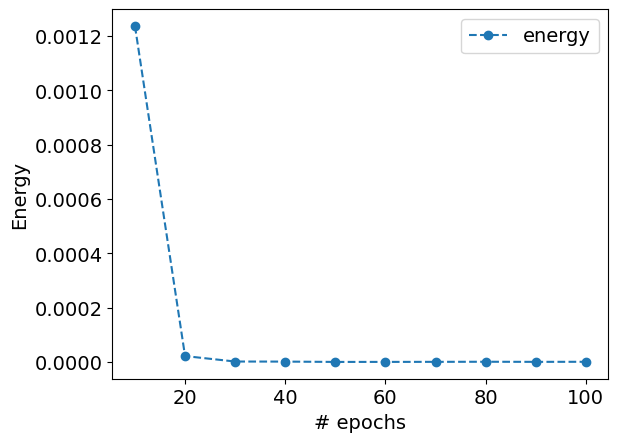

In [21]:
plt.plot(list(range(printrate, epochs+printrate, printrate)), energy, label="energy", ls="--", marker="o")
plt.xlabel("# epochs")
plt.ylabel("Energy")
plt.legend()
plt.show()

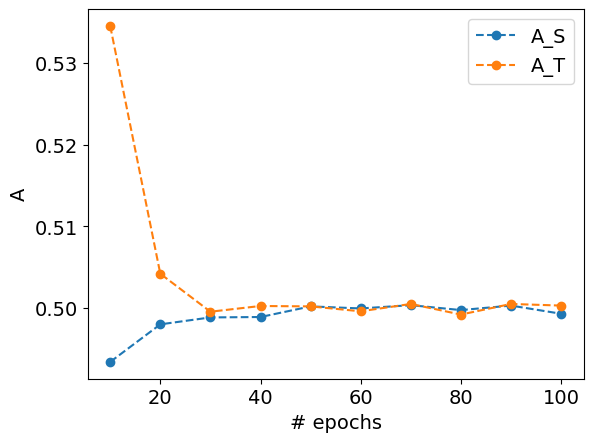

In [22]:
plt.plot(list(range(printrate, epochs+printrate, printrate)), A_S, label="A_S", ls="--", marker="o")
plt.plot(list(range(printrate, epochs+printrate, printrate)), A_T, label="A_T", ls="--", marker="o")
plt.xlabel("# epochs")
plt.ylabel("A")
plt.legend()
plt.show()

In [24]:
df = pd.DataFrame(columns=["epochs", "energy", "A_S", "A_T", "score", "entropy"])#, "log_likelihood"])
df["epochs"] = list(range(printrate-1, epochs+printrate-1, printrate))
df["energy"] = energy
df["A_S"] = A_S
df["A_T"] = A_T
df["score"] = score
df["entropy"] = entropy
# df["log_likelihood"] = log_res

In [25]:
df

,epochs,energy,A_S,A_T,score,entropy
0,9,1.237262e-03,0.49340,0.53455,0.5291,-0.039359
1,19,2.164000e-05,0.49800,0.50420,0.7181,-0.016236
2,29,1.525000e-06,0.49885,0.49955,0.7640,-0.000578
3,39,1.272500e-06,0.49890,0.50025,0.7698,-0.007374
4,49,8.000000e-08,0.50020,0.50020,0.7803,-0.001599
5,59,1.625000e-07,0.49995,0.49960,0.7803,-0.000489
6,69,3.725000e-07,0.50035,0.50050,0.7811,-0.000845
7,79,7.025000e-07,0.49975,0.49920,0.7722,-0.005750
8,89,3.400000e-07,0.50030,0.50050,0.7784,-0.002441
9,99,5.800000e-07,0.49930,0.50030,0.7764,-0.003370


### **Heatmap plot of the weights**: we show here the functions borrowed from matplotlib and modified to show the weights plot

In [26]:
# Functions taken from https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html


title = "Visible weights of data_b"
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs) #im now contains the data

    
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, location = "bottom", pad=0.03, aspect=30, **cbar_kw) 
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels, fontsize=25)
    
    
    ax.set_xlabel(title, labelpad = 10, fontsize=15)
    ax.xaxis.set_label_position('top')
    
    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0,
             rotation_mode="anchor", fontsize=20)

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

In [27]:
def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = mplt.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    font = {"size":10}
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), fontdict = font, **kw)
            texts.append(text)

    return texts

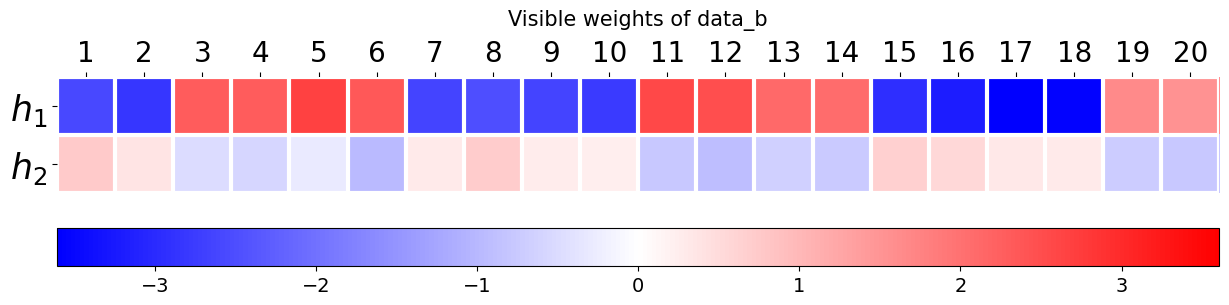

In [28]:
draw_weigths = True
if draw_weigths:
    fig, ax = plt.subplots(figsize=(15,15))
    fig.set_size_inches = (15,5) 
    
    bits = np.arange(1,21)
    hidden_variables = ["$h_1$","$h_2$"]
    im, cbar = heatmap(w.T, hidden_variables, bits, ax=ax,cmap="bwr", norm=mplt.colors.CenteredNorm())

    # plt.savefig("data_weights.png",bbox_inches="tight")
    plt.show()